# Credi Card Fraud Detection

The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.<br><br>
There datasets use in this model contains over 550,000 records of credit card transactions made by European cardholders in the year 2023, also 284,807 records in the year 2013, and the data has been anonymized to protect the cardholders' identities.

**Data repo:**
[2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)
[2013](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## Load dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seabor library for interactive visualization
%matplotlib inline
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount Google Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the data
file_path1 = ('/content/drive/My Drive/Colab Notebooks/COMP642/creditcard_2023.pkl')
file_path2 = ('/content/drive/My Drive/Colab Notebooks/COMP642/creditcard_2013.pkl')

# Reading the file
data1 = pd.read_pickle(file_path1)
data2 = pd.read_pickle(file_path2)

In [4]:
data1

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [5]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Wrangling

#### Remove irrelevant info

In [6]:
# remove irrelevant info
data1 = data1.drop('id', axis='columns')
data2 = data2.drop('Time', axis='columns')

# merge several datas into a single data set
df = pd.concat([data1, data2], axis=0)
df.reset_index(drop=True, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853432,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
853433,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
853434,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
853435,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853437 entries, 0 to 853436
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      853437 non-null  float64
 1   V2      853437 non-null  float64
 2   V3      853437 non-null  float64
 3   V4      853437 non-null  float64
 4   V5      853437 non-null  float64
 5   V6      853437 non-null  float64
 6   V7      853437 non-null  float64
 7   V8      853437 non-null  float64
 8   V9      853437 non-null  float64
 9   V10     853437 non-null  float64
 10  V11     853437 non-null  float64
 11  V12     853437 non-null  float64
 12  V13     853437 non-null  float64
 13  V14     853437 non-null  float64
 14  V15     853437 non-null  float64
 15  V16     853437 non-null  float64
 16  V17     853437 non-null  float64
 17  V18     853437 non-null  float64
 18  V19     853437 non-null  float64
 19  V20     853437 non-null  float64
 20  V21     853437 non-null  float64
 21  V22     85

In [8]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,...,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,8.534370e+05,853437.000000,853437.000000
mean,3.622828e-16,2.357827e-17,-4.854194e-16,6.849688e-16,3.544734e-16,4.692343e-16,-2.166004e-16,5.100300e-17,-7.467785e-16,8.783406e-16,...,8.701565e-17,-1.143446e-16,9.263131e-17,1.491218e-15,1.523263e-16,5.570762e-16,-1.460862e-16,-2.396958e-17,8052.827520,0.333718
std,1.395200e+00,1.255496e+00,1.197292e+00,1.155543e+00,1.141070e+00,1.121879e+00,1.084898e+00,1.068795e+00,1.033962e+00,1.030503e+00,...,9.199630e-01,9.176234e-01,8.924216e-01,8.880840e-01,8.700369e-01,8.624886e-01,8.489122e-01,8.382382e-01,7980.903363,0.471541
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-2.256568e+01,-3.903524e+01,0.000000,0.000000
25%,-6.823970e-01,-5.064883e-01,-6.883446e-01,-7.219500e-01,-4.307846e-01,-6.130605e-01,-3.875514e-01,-1.946538e-01,-5.979740e-01,-5.672060e-01,...,-1.825699e-01,-5.057740e-01,-2.108657e-01,-5.353059e-01,-4.585099e-01,-5.049413e-01,-2.583094e-01,-1.538807e-01,75.930000,0.000000
50%,-8.152553e-02,-9.337775e-02,3.654564e-02,-5.880031e-02,5.403578e-02,-1.486917e-02,1.800122e-01,-8.737144e-02,4.670245e-02,8.244696e-02,...,-3.531723e-02,-1.650071e-02,-4.098598e-02,3.015686e-02,1.813021e-03,-3.410912e-02,-5.293470e-02,4.151412e-03,6045.950000,0.000000
75%,1.006219e+00,4.782555e-01,7.518550e-01,7.183214e-01,4.806525e-01,4.781018e-01,5.347508e-01,1.373579e-01,5.694575e-01,5.751859e-01,...,1.635730e-01,4.848806e-01,1.525449e-01,5.602493e-01,4.618753e-01,4.872230e-01,1.951870e-01,2.108455e-01,15024.850000,1.000000
max,2.454930e+00,2.205773e+01,1.412583e+01,1.687534e+01,4.271689e+01,7.330163e+01,2.178730e+02,2.000721e+01,2.027006e+01,3.172271e+01,...,2.720284e+01,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,25691.160000,1.000000


#### Handle missing value

In [9]:
df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Data Exploaration

### Check for Data Imbalance

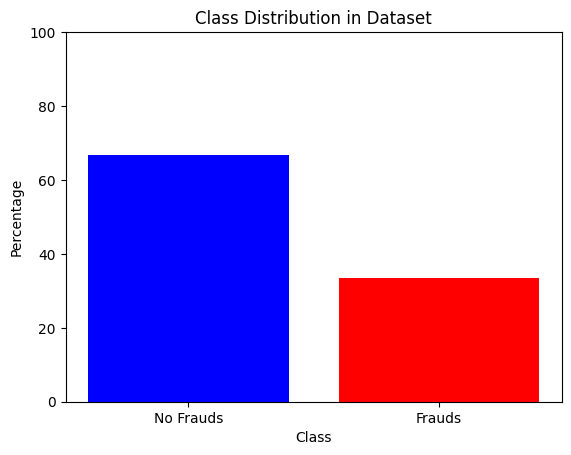

No Frauds 66.63 % of the dataset
Frauds 33.37 % of the dataset


In [10]:
# See if the data is imbalnce
classes = ['No Frauds', 'Frauds']
percentages = [round(df['Class'].value_counts()[0]/len(df) * 100,2), round(df['Class'].value_counts()[1]/len(df) * 100,2)]

# Creating a bar chart
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.bar(classes, percentages, color=['blue', 'red'])

axs.bar(classes, percentages, color=['blue', 'red'])
axs.set_title('Class Distribution in Dataset')
axs.set_xlabel('Class')
axs.set_ylabel('Percentage')
axs.set_ylim(0, 100)

# Showing the plot
plt.show()

print('No Frauds', percentages[0], '% of the dataset')
print('Frauds', percentages[1] , '% of the dataset')

**Note:**<br>
With a class distribution of 66.63% "No Frauds" and 33.37% "Frauds" in your dataset, we're dealing with a **moderate level of imbalance**. This is particularly notable in the context of fraud detection, where the imbalance is actually quite common and expected—fraudulent transactions are typically less frequent than legitimate ones. <br>
If we use this dataframe as the base for our predictive models and analysis we might get some errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

### Remove outliers
Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


In [11]:
def remove_outliers(df, features):
  df_old = df
  for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those values outside the range of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    outliers = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))]

    # Remove outliers
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]


  print("Original DataFrame size:", df_old.shape)
  print("New DataFrame size:", df.shape)
  return df

In [12]:
df_remove = remove_outliers(df, df.columns[0:-1])
df_remove

Original DataFrame size: (853437, 30)
New DataFrame size: (331910, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,0.453469,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853427,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
853430,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
853431,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
853433,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0


### Reassess Data Imbalance after remove outliees

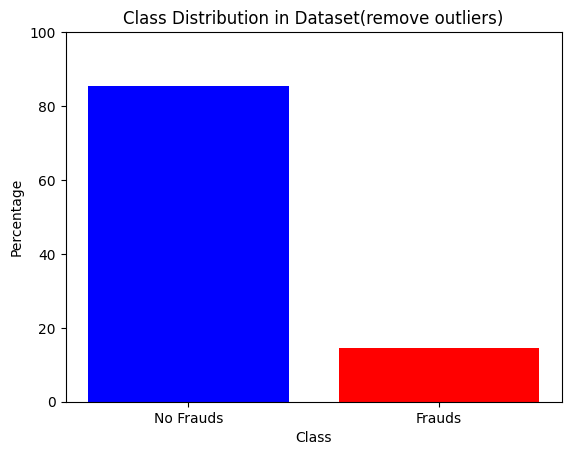

No Frauds 85.42 % of the dataset
Frauds 14.58 % of the dataset


In [13]:
# Reassess Data Imbalance:
classes = ['No Frauds', 'Frauds']
percentages = [round(df_remove['Class'].value_counts()[0]/len(df_remove) * 100,2), round(df_remove['Class'].value_counts()[1]/len(df_remove) * 100,2)]

# Creating a bar chart
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.bar(classes, percentages, color=['blue', 'red'])

axs.bar(classes, percentages, color=['blue', 'red'])
axs.set_title('Class Distribution in Dataset(remove outliers)')
axs.set_xlabel('Class')
axs.set_ylabel('Percentage')
axs.set_ylim(0, 100)

# Showing the plot
plt.show()

print('No Frauds', percentages[0], '% of the dataset')
print('Frauds', percentages[1] , '% of the dataset')

After remove the outliers the imbalance become more severe.

### OverSampling

Now we need to do oversampling to handle the imbalance data

In [14]:
# deal with imbalance data
! pip install imbalanced-learn

In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 'df_remove' is your DataFrame and 'Class' is the target feature

# Separate input features and target variable
X = df_remove.drop('Class', axis=1)
y = df_remove['Class']

# Set up the Random UnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_rus, y_rus = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_rus = pd.DataFrame(X_rus, columns=X.columns)
df_rus['Class'] = y_rus

# Set up the Random OverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_ros, y_ros = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_ros = pd.DataFrame(X_ros, columns=X.columns)
df_ros['Class'] = y_ros

### Equally Distributing and Correlating

Distribution of the Classes in the new oversample dataset


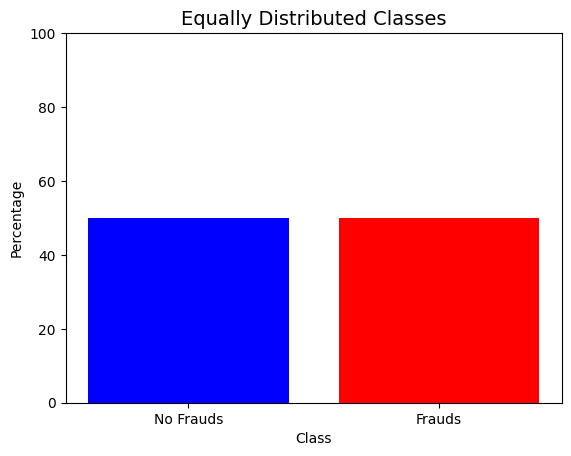

In [16]:
print('Distribution of the Classes in the new oversample dataset')
classes = ['No Frauds', 'Frauds']
percentages = [round(df_ros['Class'].value_counts()[0]/len(df_ros) * 100,2), round(df_ros['Class'].value_counts()[1]/len(df_ros) * 100,2)]

# Creating a bar chart
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.bar(classes, percentages, color=['blue', 'red'])

axs.bar(classes, percentages, color=['blue', 'red'])
axs.set_title('Class Distribution in Dataset')
axs.set_xlabel('Class')
axs.set_ylabel('Percentage')
axs.set_ylim(0, 100)
axs.set_title('Equally Distributed Classes', fontsize=14)

# Showing the plot
plt.show()

Now our data is correctly balanced, we can go further with our **analysis** and **data preprocessing**.

In [17]:
# get the correlation matrix
corr_matrix = df_ros.corr()

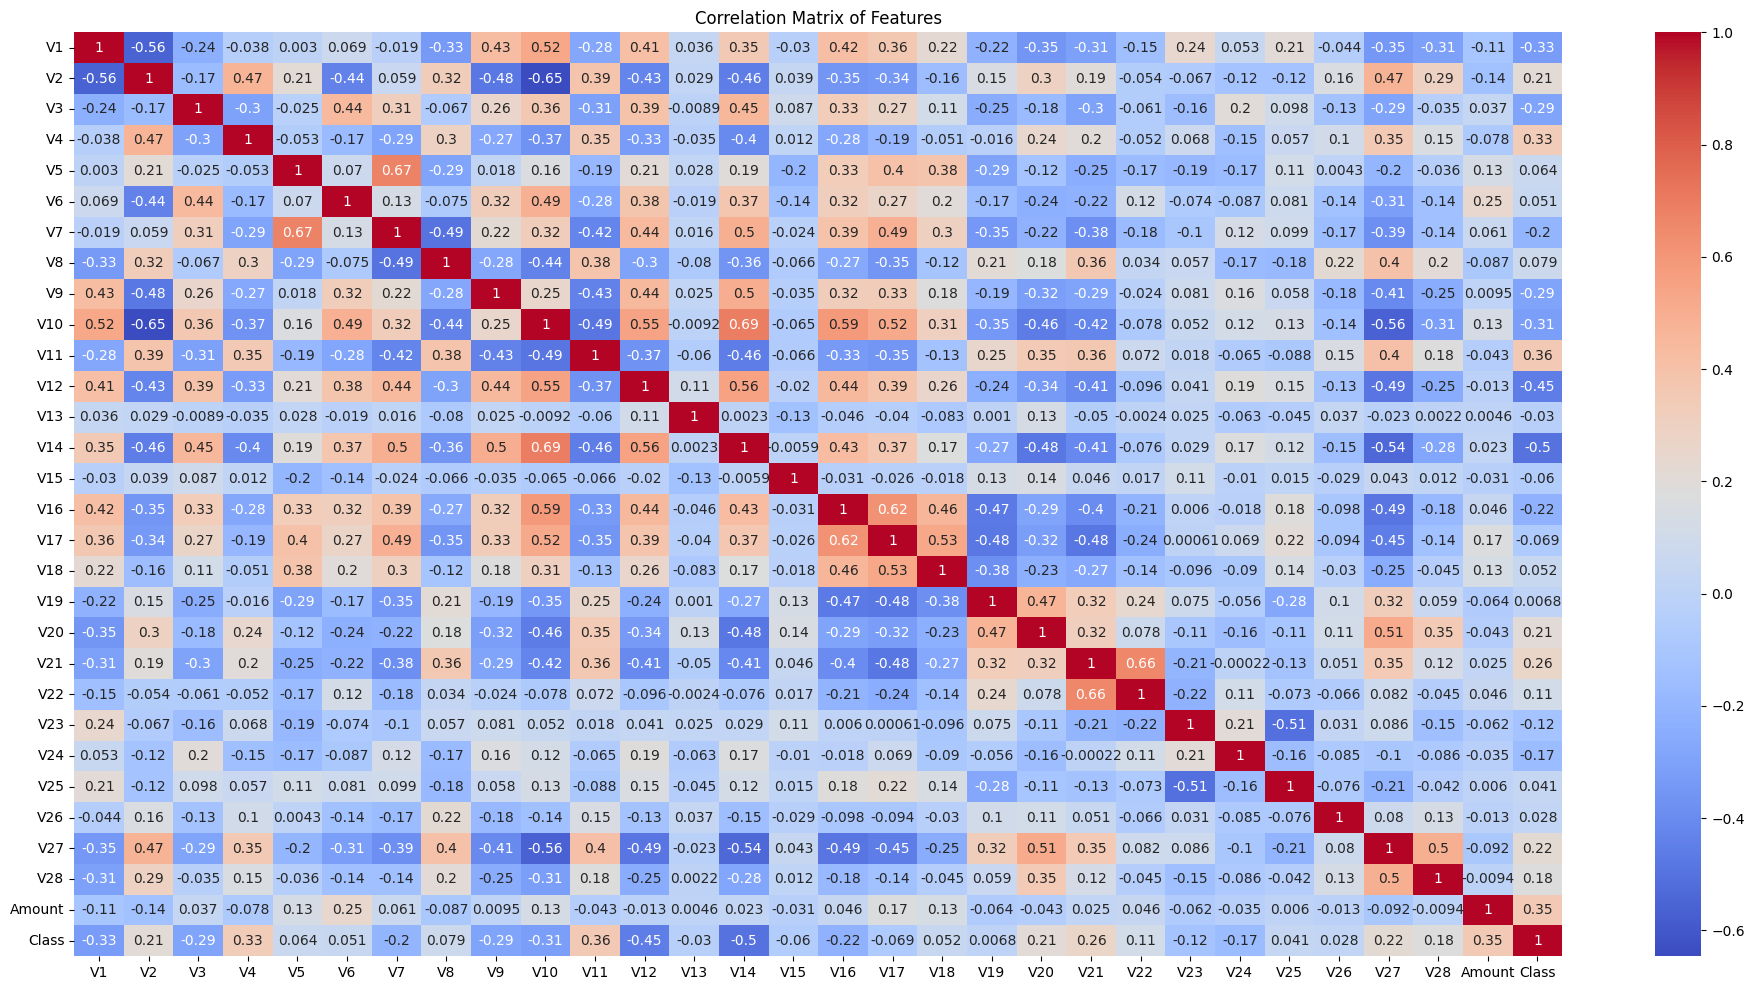

In [18]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


**Summary and Explanation:**


*   **Positive Correlations:**<br>
Features such as V4, and V11 demonstrate a positive correlation with the target 'Class'. This suggests that higher values of these features are more common in fraudulent transactions.
*   **Negative Correlations:**<br>
Certain features in the dataset exhibit a negative correlation with the target variable 'Class', which in this context we understand to represent fraudulence. Specifically, features like V14, and V12 show a trend where their lower values tend to be associated with fraudulent transactions.
*   **BoxPlots:**<br>
We can use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.






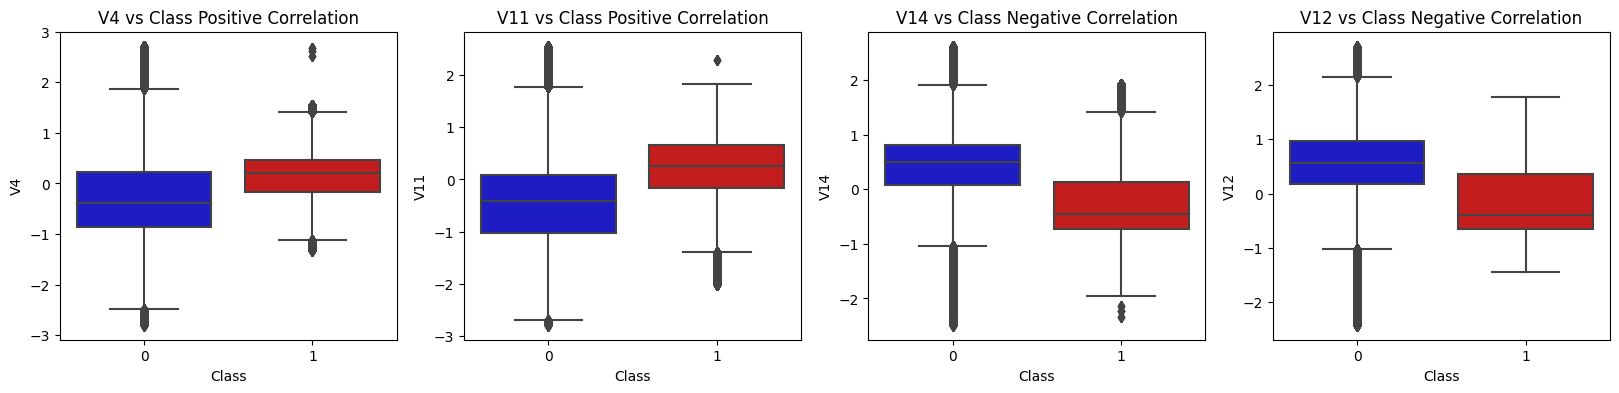

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

colors = ["#0101DF", "#DF0101"]

# Positive Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V4", data=df_ros, palette=colors, ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=df_ros, palette=colors, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')

# Negative correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V14", data=df_ros, palette=colors, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df_ros, palette=colors, ax=axes[3])
axes[3].set_title('V12 vs Class Negative Correlation')

plt.show()

Although we already removed the outliers, there are still some outliers present in these high-corelated features, so we plan to use RobustScaler later, this scaler is particularly well-suited for datasets with outliers.<br><br> Since the remaining outliers are not due to errors or noise and they represent valuable extreme cases for the analysis or predictive modeling, RobustScaler uses the median and the interquartile range (IQR) for scaling, which are less sensitive to outliers than the mean and standard deviation used by StandardScaler.



<Axes: >

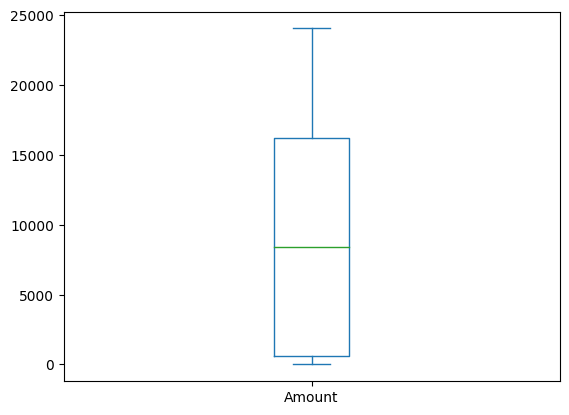

In [20]:
# See the distribution of 'amount feature'
df_ros['Amount'].plot.box()

The distribution of the "Amount" feature is right-skewed, we will also use RobustScaler to scale the data.

### Scaling

In [21]:
# most columns of our data has already been scaled we should scale the columns that are left to scale Amount
# RobustScaler is less prone to outliers.
def RobustScaled(df):
  rob_scaler = RobustScaler()
  for feature in df.columns[0:-1]:
    df[feature] = rob_scaler.fit_transform(df[feature].values.reshape(-1,1))
  return df

df_ros = RobustScaled(df_ros) # (balance data)
df_remove = RobustScaled(df_remove) # use for baseline model (imbalance data)

## Modeling

### Split the dataset

In [22]:
# baseline data
X_baseline = df_remove.drop('Class', axis=1)
y_baseline = df_remove['Class']

X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)


# Turn the values into an array for feeding the classification algorithms.
feature_names = X_baseline.columns
X_train_baseline = X_train_baseline.values
X_test_baseline = X_test_baseline.values
y_train_baseline = y_train_baseline.values
y_test_baseline = y_test_baseline.values

In [23]:
# split the dataset for training and testing
X = df_ros.drop('Class', axis=1)
y = df_ros['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Turn the values into an array for feeding the classification algorithms.
feature_names = X.columns
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Define a SimpleClassifier class


Since we will use different model to compare the results, define a class will be easier and more efficient.<br>
This class will take an model as an input, fit it to the training data, perform cross-validation, make predictions, and evaluate the model using a classification report and ROC-AUC score. It also includes a method to plot the ROC curve.

In [24]:
class SimpleClassifier:
    def __init__(self, model, feature_names=None):
        self.model = model
        self.model_name = model.__class__.__name__
        self.roc_auc = None
        self.fpr = None
        self.tpr = None
        self.thresholds = None

    # Training
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        training_score = cross_val_score(self.model, X_train, y_train, cv=5)
        print(f"Model has a training score of {round(training_score.mean(), 2) * 100:.2f}% accuracy score")

    # Testing
    def predict(self, X_test):
        return self.model.predict(X_test)

    # Evaluate
    def evaluate(self, X_test, y_test):
        predictions = self.predict(X_test)
        print(classification_report(y_test, predictions, digits=4))

        # ROC-AUC score
        proba_predictions = self.model.predict_proba(X_test)[:, 1]
        self.roc_auc = roc_auc_score(y_test, proba_predictions)
        print(f'ROC-AUC score: {self.roc_auc:.4f}')

        # Calculate the ROC curve
        self.fpr, self.tpr, self.thresholds = roc_curve(y_test, proba_predictions)

    def plot_roc_curve(self):
        if self.roc_auc is None or self.fpr is None or self.tpr is None:
            raise ValueError("You must first call the evaluate method.")

        plt.figure()
        plt.plot(self.fpr, self.tpr, label= self.model_name + f' (area = {self.roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()


### Baseline(LogisiticRegression)
using the imbalnce data





In [25]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the class with Logistic Regression
baseline = SimpleClassifier(LogisticRegression(max_iter=1000), feature_names) # Set max_iter to a high value to ensure convergence

# Fit the model to the training data
baseline.fit(X_train_baseline, y_train_baseline)

Model has a training score of 94.00% accuracy score


              precision    recall  f1-score   support

           0     0.5386    0.9992    0.6999     56262
           1     0.9950    0.1574    0.2717     57151

    accuracy                         0.5750    113413
   macro avg     0.7668    0.5783    0.4858    113413
weighted avg     0.7686    0.5750    0.4842    113413

ROC-AUC score: 0.9586


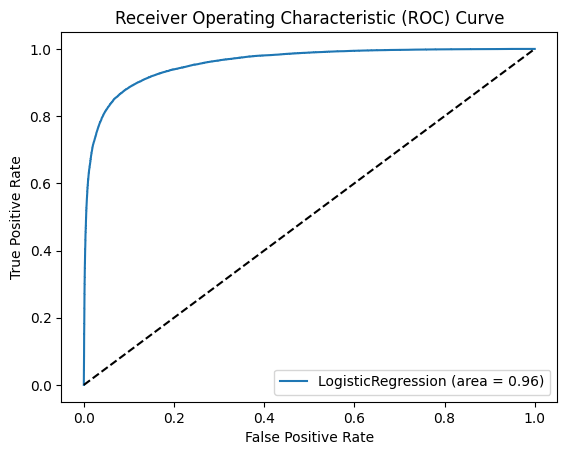

In [26]:
# Evaluate the model on the test data
baseline.evaluate(X_test, y_test)

# Plot the ROC curve
baseline.plot_roc_curve()

### LogisiticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the class with Logistic Regression
log_reg = SimpleClassifier(LogisticRegression(max_iter=1000), feature_names) # Set max_iter to a high value to ensure convergence

# Fit the model to the training data
log_reg.fit(X_train, y_train)

Model has a training score of 91.00% accuracy score


              precision    recall  f1-score   support

           0     0.9036    0.9090    0.9063     56262
           1     0.9099    0.9045    0.9072     57151

    accuracy                         0.9067    113413
   macro avg     0.9067    0.9068    0.9067    113413
weighted avg     0.9068    0.9067    0.9067    113413

ROC-AUC score: 0.9658


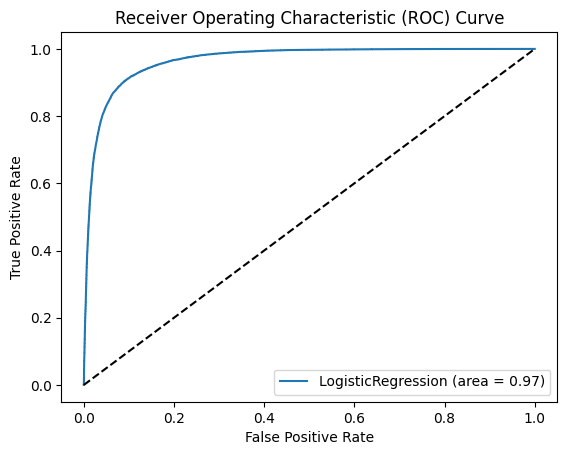

In [28]:
# Evaluate the model on the test data
log_reg.evaluate(X_test, y_test)

# Plot the ROC curve
log_reg.plot_roc_curve()

The classification report on the test set shows high precision, recall, and F1-scores for both classes (0 and 1), which are also above 90%.

Since our data is imbalnce data, we also consider looking at ROC-AUC score to check the performance.

### DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dct_clf = SimpleClassifier(DecisionTreeClassifier())
dct_clf.fit(X_train, y_train)

Model has a training score of 100.00% accuracy score


              precision    recall  f1-score   support

           0     1.0000    0.9982    0.9991     56262
           1     0.9982    1.0000    0.9991     57151

    accuracy                         0.9991    113413
   macro avg     0.9991    0.9991    0.9991    113413
weighted avg     0.9991    0.9991    0.9991    113413

ROC-AUC score: 0.9991


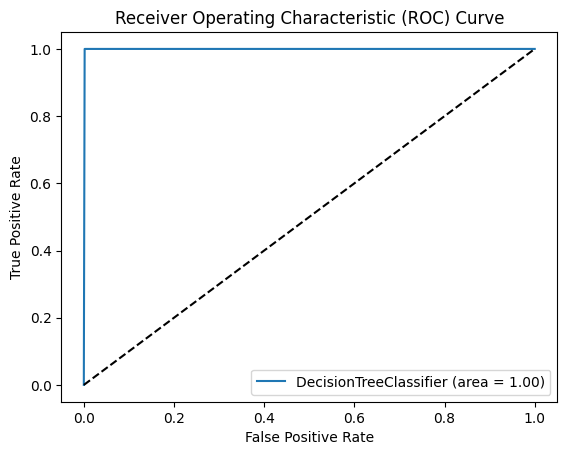

In [30]:
dct_clf.evaluate(X_test, y_test)
dct_clf.plot_roc_curve()

### XGBClassifier

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier

# Assuming X_train and y_train are already defined and preprocessed
# Initialize the XGBClassifier
xgb_clf = SimpleClassifier(XGBClassifier(random_state=0,
                                         use_label_encoder=False,
                                         eval_metric='logloss').fit(X_train, y_train))

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

Model has a training score of 100.00% accuracy score


              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56262
           1     0.9998    1.0000    0.9999     57151

    accuracy                         0.9999    113413
   macro avg     0.9999    0.9999    0.9999    113413
weighted avg     0.9999    0.9999    0.9999    113413

ROC-AUC score: 1.0000


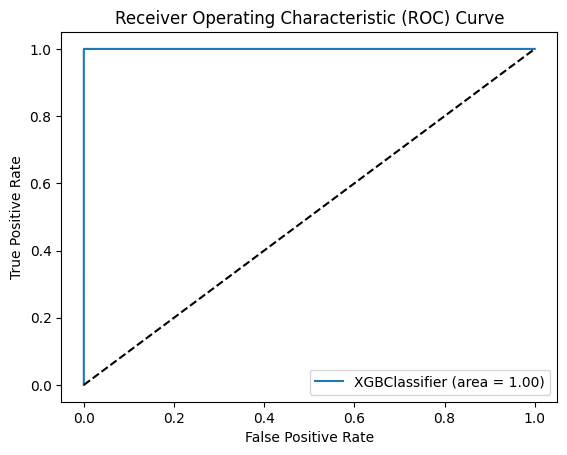

In [32]:
xgb_clf.evaluate(X_test, y_test)
xgb_clf.plot_roc_curve()

### HistGradientBoostingClassifier


The HistGradientBoostingClassifier is an ensemble machine learning algorithm in scikit-learn, introduced in version 0.21. It is based on histograms, which allows for faster training and prediction times, especially on large datasets. It's similar to other gradient boosting algorithms but uses histograms to bin continuous feature values into discrete bins, which speeds up the calculations

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_clf = SimpleClassifier(HistGradientBoostingClassifier(random_state = 0,).fit(X_train, y_train))
hgb_clf.fit(X_train, y_train)

Model has a training score of 100.00% accuracy score


              precision    recall  f1-score   support

           0     0.9997    0.9985    0.9991     56262
           1     0.9985    0.9997    0.9991     57151

    accuracy                         0.9991    113413
   macro avg     0.9991    0.9991    0.9991    113413
weighted avg     0.9991    0.9991    0.9991    113413

ROC-AUC score: 0.9999


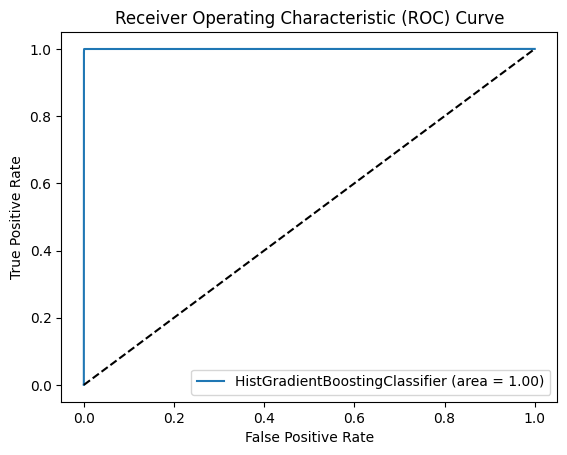

In [34]:
hgb_clf.evaluate(X_test, y_test)
hgb_clf.plot_roc_curve()

## Objectives


### Imbalance data



**Usage Scenario for Imbalanced Data:**
- **Problem**: In a dataset for fraud detection, legitimate transactions vastly outnumber fraudulent ones. Standard machine learning models trained on such data tend to be biased towards predicting the majority class, resulting in a high number of false negatives for the minority class (fraud), which is usually the class of greater interest.
  
**Associated Deployment Level Challenges:**
- **Model Performance**: Standard accuracy metrics become misleading; models might ignore the minority class entirely yet achieve high accuracy.
- **Business Impact**: Missing frauds (false negatives) could have a significant financial or security impact.
  
**Proposed Solutions:**
- **Data-Level Techniques**: Oversampling the minority class, undersampling the majority class, or generating synthetic samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique).
- **Algorithm-Level Techniques**: Adjusting the decision threshold, using anomaly detection algorithms, or applying cost-sensitive learning where misclassifying the minority class incurs a higher penalty.
- **Evaluation Metrics**: Employing metrics like F1-score, Precision-Recall AUC, or the Matthews correlation coefficient that give a better sense of model performance on imbalanced datasets.

**Experiments to Demonstrate Performance:**
- **Baseline Model**: Train a standard model without addressing the imbalance to establish a baseline performance.
- **Improved Models**: Implement the proposed solutions and demonstrate their effect by comparing their performance to the baseline using the aforementioned metrics.

**Experimentation and Results:**
- The performance of each approach should be recorded, and any improvements in the detection of the minority class should be highlighted.
- It's also important to discuss the trade-offs of each method, such as the increased training time with oversampling or the potential loss of information with undersampling.


When comparing the performance metrics for both classes, it's important to consider how the treatment of imbalanced data affects the minority class (class 1), as this is often the class of greater interest in imbalanced datasets. Let's review the metrics for class 1 along with class 0 for both the baseline model and the model after addressing imbalance.

**Baseline Model (Imbalanced Data):**
- **Accuracy**: High at 94.08% overall, but this does not reflect the true performance on each class.
- **Class 0 (Majority Class) Performance**:
    - **Precision**: Low at approximately 0.54, suggesting many false positives.
    - **Recall**: Very high, almost 1, meaning the model is good at identifying the majority class.
    - **F1-Score**: Moderate, not representative of true positive predictive performance.
- **Class 1 (Minority Class) Performance**:
    - **Precision**: Very high at approximately 0.995, but this is likely because the model makes very few positive predictions for the minority class.
    - **Recall**: Very low at approximately 0.1574, indicating the model is missing many actual instances of the minority class (high false negative rate).
    - **F1-Score**: Very low at approximately 0.2717, reflecting poor performance on the minority class.
- **ROC-AUC Score**: 0.9586, indicating a good trade-off between true positive rate and false positive rate when considering both classes together.

**Model After Addressing Imbalance:**
- **Accuracy**: Lower at 91.08%, which is more balanced across classes.
- **Class 0 (Majority Class) Performance**:
    - **Precision**: Improved to approximately 0.9036, indicating fewer false positives.
    - **Recall**: Slightly lower but still high, indicating good coverage of the majority class.
    - **F1-Score**: Improved, showing a better balance between precision and recall.
- **Class 1 (Minority Class) Performance**:
    - **Precision**: Slightly lower at approximately 0.9099, but this is expected as the model is now making more positive predictions for the minority class.
    - **Recall**: Greatly improved to approximately 0.9045, indicating the model is now correctly identifying most of the actual instances of the minority class.
    - **F1-Score**: Greatly improved to approximately 0.9072, reflecting significantly better performance on the minority class.
- **ROC-AUC Score**: Slightly improved at 0.9658, reinforcing the model's improved ability to distinguish between classes.

**Comparative Insights:**
- The improvement in recall for class 1 is particularly important, as it means the model is now much better at detecting the minority class, which is often the primary objective in imbalanced datasets.
- The F1-score for class 1 has seen a significant improvement, which is critical since it takes both precision and recall into account, giving a more comprehensive view of the model's performance on the minority class.
- The slight decrease in precision for class 1 is a trade-off that comes with making more correct positive predictions for the minority class, which is usually a worthwhile trade in the context of imbalanced datasets.
- The ROC-AUC score's improvement for the model after addressing imbalance indicates better overall performance, particularly in distinguishing between the two classes.

**Conclusion:**
The model's performance after addressing the imbalance shows a much more balanced and accurate prediction capability across both classes. It is particularly successful in improving the detection of the minority class without excessively compromising the precision, which is a common challenge in imbalanced datasets. The improved F1-score and recall for the minority class suggest that the model is now more useful in practical applications where correctly identifying instances of the minority class is crucial.

### Feature Importance

In [35]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.7 MB/s eta 0:00:00


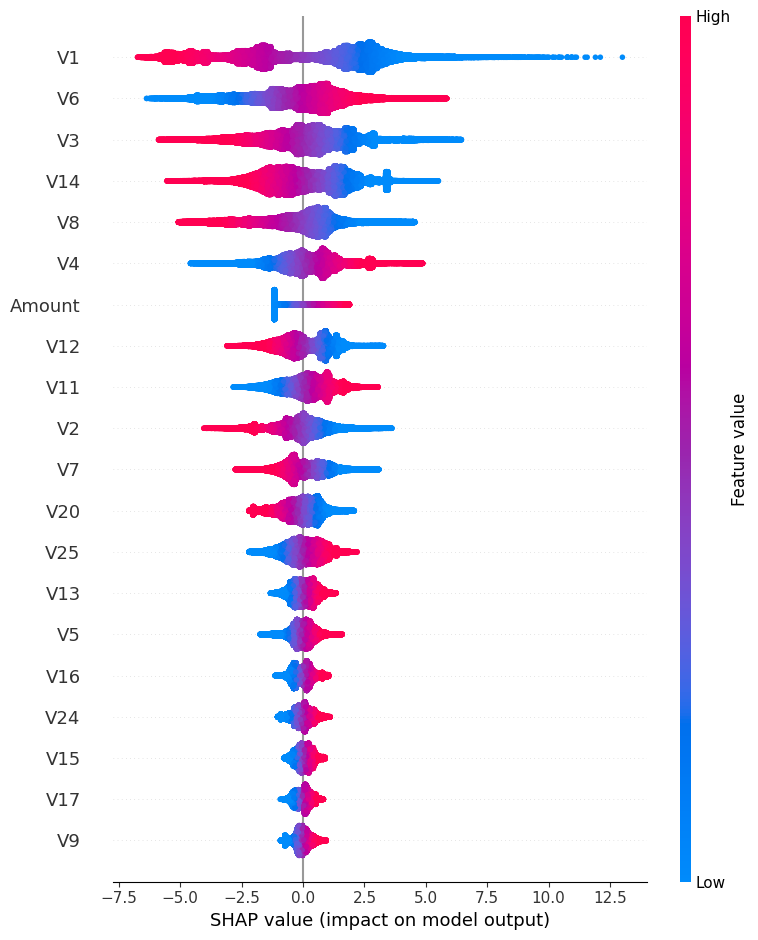

In [36]:
import shap
explainer = shap.LinearExplainer(log_reg.model, X_train, feature_dependence="independent")

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values,
                  X_test,
                  show=False,
                  #max_display=X_test.shape[1], # show all features' importance
                  feature_names = feature_names)

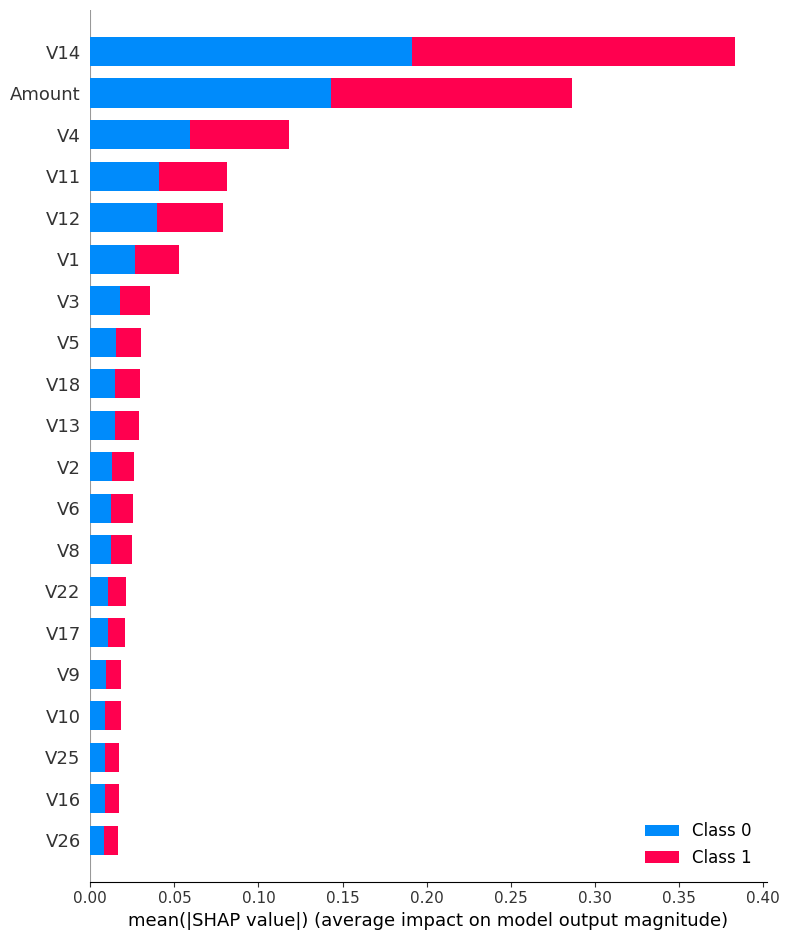

In [37]:
# Create a TreeExplainer
explainer2 = shap.TreeExplainer(dct_clf.model)

# Compute SHAP values
shap_values2 = explainer2.shap_values(X_test)


shap.summary_plot(shap_values2,
                  X_test,
                  show=False,
                  #max_display=X_test.shape[1], # show all features' importance
                  feature_names = feature_names)

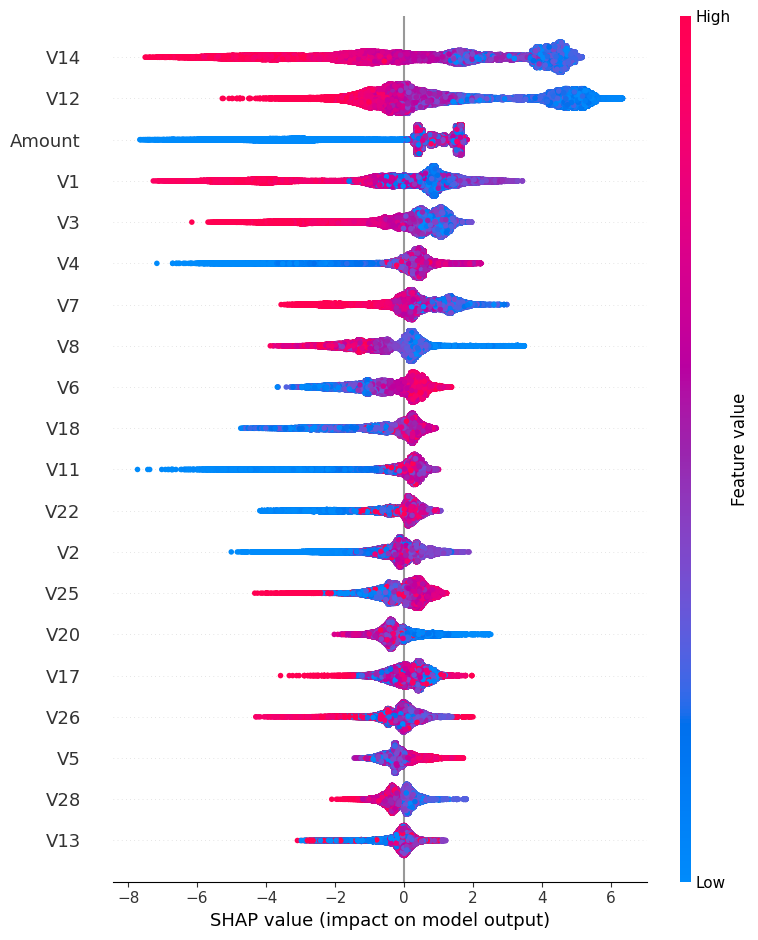

In [38]:
# Create a TreeExplainer
explainer3 = shap.TreeExplainer(xgb_clf.model)

# Compute SHAP values
shap_values3 = explainer3.shap_values(X_test)


shap.summary_plot(shap_values3,
                  X_test,
                  show=False,
                  #max_display=X_test.shape[1], # show all features' importance
                  feature_names = feature_names)

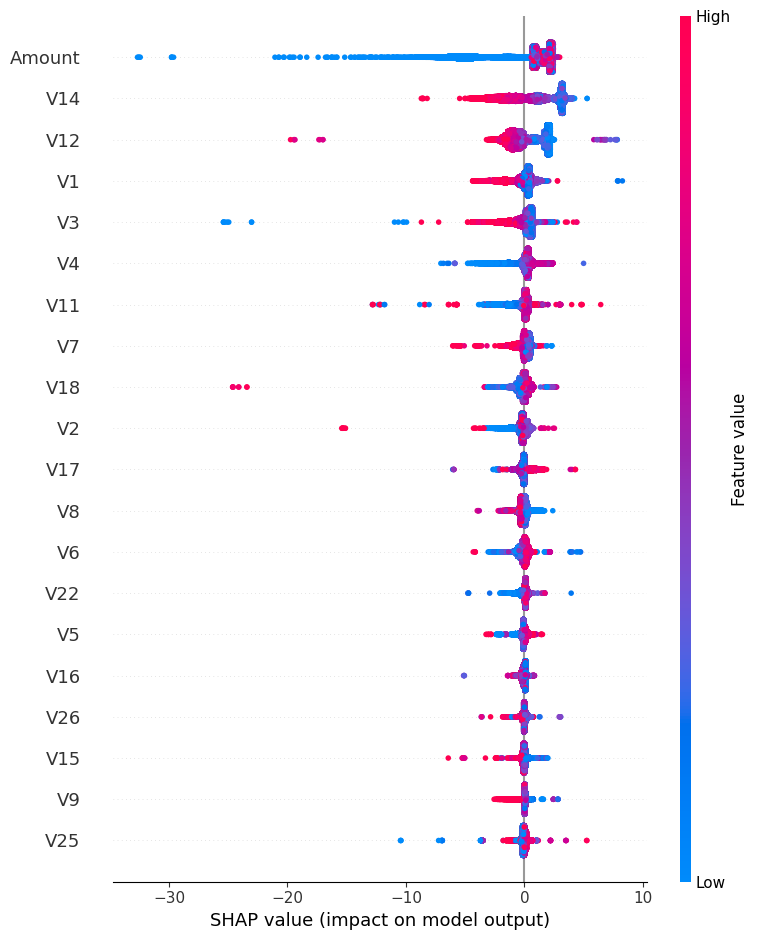

In [39]:
# Create a TreeExplainer
explainer4 = shap.TreeExplainer(hgb_clf.model)

# Compute SHAP values
shap_values4 = explainer4.shap_values(X_test)


shap.summary_plot(shap_values4,
                  X_test,
                  show=False,
                  #max_display=X_test.shape[1], # show all features' importance
                  feature_names = feature_names)